### Boris Alladassi 
### BCB 546X Python Assignment
Date: November 25th, 2019

### Description
This Python script was developed using *Python 3*. It was written to:
1. translate a myhtocondrial dna sequence from a *fasta* file into amino acids sequence,
2. determine the molecular weight of the amino acid sequence,
3. compute the GC-content of the dna sequence and,
4. conduct basic exploratory data analysis unsing barplot and scatterplot.

### Dependencies
1. For this script to work properly, we need to first install *biopython* ideally from the command line by typing: ``pip install biopython``
2. Next, we neeed to load a few modules from Biopython(see below)
3. And finally, we need to load two Python packages *pandas* and *numpy* (see below)
    *Note: If any of these packages is not intalled, you should first do *pip install package_name*

In [1]:
#Modules and submodules from biopython
from Bio import SeqIO
from Bio.Data import CodonTable
from Bio.Alphabet import generic_dna
from Bio.Seq import Seq
from Bio.SeqUtils.ProtParam import ProteinAnalysis

#Python packages
import pandas as pd
import numpy as np

### Funtion "get_sequences_from_file"
    **Description:** This function helps to retrieve dna sequence from a fasta file.
    **Input:** a fasta file
    **Output:** A dictionnary with species_name as key and the corresponding dna sequence as its value.

In [2]:
def get_sequences_from_file(fasta_fn):
    sequence_data_dict = {}
    for record in SeqIO.parse(fasta_fn, "fasta"):
        description = record.description.split()
        species_name = description[1] + " " + description[2]
        sequence_data_dict[species_name] = record.seq
    return(sequence_data_dict)

### Funtion "translate_function"
    **Description:** This function translates a mitochondrial dna sequence into amino acid sequence.
    **Input:** a string of dna sequence
    **Output:** a list of amino acid sequence.
    Note: this code is written to terminate translation at the first stop codon.

In [3]:
def translate_function(string_nucleotides): 
    mito_table = CodonTable.unambiguous_dna_by_name["Vertebrate Mitochondrial"]
    aa_seq_string = ""
    index = 0
    
    for pos in range(0, len(string_nucleotides)//3):
        codon = string_nucleotides[index:index+3]
        index += 3
        
        if codon == "TAA" or codon == "TAG" or codon == "AGA" or codon == "AGG":
            break
        else:
            aa = mito_table.forward_table[codon]
            aa_seq_string = aa_seq_string + aa
            
    return(aa_seq_string)

In [4]:
# As a checkpoint, I printed the codon table for confirmation
Table = CodonTable.unambiguous_dna_by_name["Vertebrate Mitochondrial"]
print(Table)

Table 2 Vertebrate Mitochondrial, SGC1

  |  T      |  C      |  A      |  G      |
--+---------+---------+---------+---------+--
T | TTT F   | TCT S   | TAT Y   | TGT C   | T
T | TTC F   | TCC S   | TAC Y   | TGC C   | C
T | TTA L   | TCA S   | TAA Stop| TGA W   | A
T | TTG L   | TCG S   | TAG Stop| TGG W   | G
--+---------+---------+---------+---------+--
C | CTT L   | CCT P   | CAT H   | CGT R   | T
C | CTC L   | CCC P   | CAC H   | CGC R   | C
C | CTA L   | CCA P   | CAA Q   | CGA R   | A
C | CTG L   | CCG P   | CAG Q   | CGG R   | G
--+---------+---------+---------+---------+--
A | ATT I(s)| ACT T   | AAT N   | AGT S   | T
A | ATC I(s)| ACC T   | AAC N   | AGC S   | C
A | ATA M(s)| ACA T   | AAA K   | AGA Stop| A
A | ATG M(s)| ACG T   | AAG K   | AGG Stop| G
--+---------+---------+---------+---------+--
G | GTT V   | GCT A   | GAT D   | GGT G   | T
G | GTC V   | GCC A   | GAC D   | GGC G   | C
G | GTA V   | GCA A   | GAA E   | GGA G   | A
G | GTG V(s)| GCG A   | GAG E   | GGG G   

### Funtion "alternative_translation"
    **Description:** This function translates a mitochondrial dna sequence into amino acid sequence.
    **Input:** a string of dna sequence
    **Output:** a string of amino acid sequence
    Note: this code is written to terminate translation at the first stop codon.

In [5]:
def alternative_translation(dna_seq):
    sequence = Seq(str(dna_seq), generic_dna)
    aa_seq = sequence.translate(table = 2, to_stop = True)
    aa_seq_string = str(aa_seq)
    return(aa_seq_string)

### Funtion "compute_molecular_weight"
    **Description:** This function computes the molecular weight of a sequence of amino acids.
    **Input:** a string of amino acid sequence
    **Output:** molecular weight as a double

In [6]:
def compute_molecular_weight(aa_seq):
    analyzed_seq = ProteinAnalysis(str(aa_seq))
    m_weight= analyzed_seq.molecular_weight()
    return(m_weight)

### Funtion "gc_content"
    **Description:** This function computes the proportion of G and C nucleotides in a dna sequence.
    **Input:** a string of dna sequence
    **Output:** proportion of G and C as a *double*.

In [7]:
def gc_content(dna_seq):
    count = dna_seq.count("G") + dna_seq.count("C")
    gc = 100 * count / len(dna_seq)
    return(gc)

Retrieve the dna sequence from the fasta file *penguins_cytb.fasta* to cytb_seqs dictionnary.
Import the dataframe "penguins_mass.csv" using *pandas*

In [8]:
cytb_seqs = get_sequences_from_file("penguins_cytb.fasta")
penguins_df = pd.read_csv("penguins_mass.csv")
species_list = list(penguins_df.species) #Create a list of species names.

Here, I added two new columns to the *penguins_df* named "Molecular_weight" and "GC_content", and used the package **Numpy** to fill them in with NANs that stand for missiing values.

In [10]:
import numpy as np

The code below is looping over the *cytb_seqs* dictionnary and:
    1. translate dna sequence of each species
    2. compute the molecular weight of the species' amino acid sequence
    3. compute the GC content of the species' dna sequence
    4. Add the values of molecular weight and GC content to the *table penguins_df*

In [33]:
for key, value in cytb_seqs.items():
    aa_seq = alternative_translation(value)
    mol_weight = compute_molecular_weight(aa_seq)
    gc_cont = gc_content(value)
    penguins_df.loc[penguins_df.species == key, 'Molecular_weight'] = mol_weight
    penguins_df.loc[penguins_df.species == key, 'GC_content'] = gc_cont

In [13]:
#To ensure that my plot will be displayed in Jupiter Notebook, I will call matplotlib.
%matplotlib inline

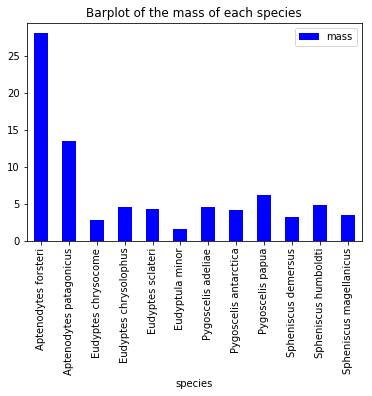

In [31]:
# Barplot of the mass of each species
penguins_df.plot(x = "species", y = "mass", kind = "bar", color = "blue",
                 title = "Barplot of the mass of each species")


Response:  
    Q1: Based on the body mass, the smallest penguin species is *Eudyptula minor*  
    Q2: The interessing thing about it is that, it looks so pretty and very short about 33 cm.

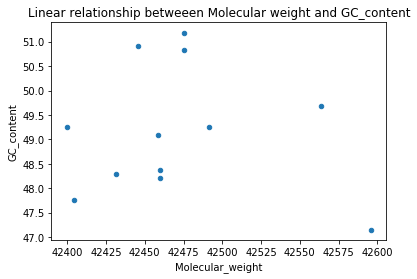

In [71]:
# Scatterplot to observ the linear relationship of Molecular weight and GC content per species.
penguins_df.plot(x= "Molecular_weight", y = "GC_content", kind = "scatter",
                title = "Linear relationship betweeen Molecular weight and GC_content")

Ouptupt the final dataframe in a comma-separated file *penguins_mass_cytb.csv* using pandas.

In [17]:
penguins_df.to_csv("penguins_mass_cytb.csv")

For the bonus point, I plotted the barplot of the molecular weight and a scatterplot for the relationship between molecular weight and mass of each species.

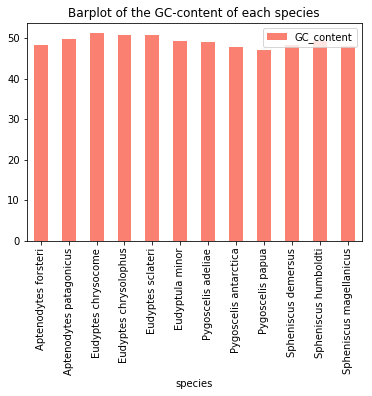

In [19]:
# Barplot of the GC content of each species
penguins_df.plot(x = "species", y = "GC_content", kind = "bar", color = "salmon",
                 title = "Barplot of the GC-content of each species")

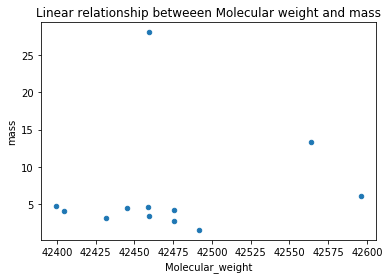

In [72]:
# Scatterplot to observ the linear relationship of Molecular weight and mass per species.
penguins_df.plot(x= "Molecular_weight", y = "mass", kind = "scatter",
                title = "Linear relationship betweeen Molecular weight and mass")

##### References  
    https://biopython.org/wiki/Seq  
    https://biopython.org/DIST/docs/api/Bio.Seq-module.html  
    https://eeob-biodata.github.io/BCB546X-python/